## SMS Spam Classifier: Multinomial Naive Bayes


In [1]:
import pandas as pd
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class','sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
len(docs)

5572

In [3]:
ham_spam = docs.Class.value_counts(normalize=True)

In [4]:
ham_spam

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

In [5]:
# spam is the postive class and its only 13 percent in the data
docs['label'] = docs.Class.map({'ham':0, 'spam':1})
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
docs = docs.drop('Class', axis=1)
docs.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test  =train_test_split(X,y,random_state=1)

In [9]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [10]:
y_train.head()

710     1
3740    0
2711    1
3155    1
3748    0
Name: label, dtype: int64

In [11]:
from sklearn.feature_extraction.text   import  CountVectorizer
vect = CountVectorizer(stop_words='english')

In [12]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [13]:
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [14]:
len(
vect.vocabulary_
)

7204

In [15]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [16]:
print(type(X_train_transformed))

<class 'scipy.sparse._csr.csr_matrix'>


In [17]:
print(X_train_transformed)

  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)

y_pred_class = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [20]:
mnb

MultinomialNB()

In [21]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [26]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1201,    7],
       [  10,  175]], dtype=int64)

In [30]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[1201    7]
 [  10  175]]


In [31]:
metrics.recall_score(
    y_test,y_pred_class
)

0.9459459459459459

In [32]:
from imblearn.metrics import specificity_score
specificity_score(y_test,y_pred_class)

0.9942052980132451

In [33]:
metrics.precision_score(y_test,y_pred_class)

0.9615384615384616

In [35]:
metrics.f1_score(y_test,y_pred_class)

0.9536784741144414

In [36]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
y_pred_proba # second column is for 1 which is spam

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [40]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr , thresholds = roc_curve(y_test,y_pred_proba[:,1])
roc_auc = auc(fpr,tpr)

In [41]:
print(roc_auc)

0.9921872203329157


In [44]:
pd.DataFrame({'fpr':fpr,
            'tpr': tpr,
            'Threshold': thresholds
              })

,fpr,tpr,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.308108,1.000000e+00
2,0.000000,0.313514,1.000000e+00
3,0.000000,0.335135,1.000000e+00
4,0.000000,0.340541,1.000000e+00
...,...,...,...
105,0.959437,1.000000,6.325596e-13
106,0.961093,1.000000,6.086604e-13
107,0.970199,1.000000,4.174215e-14
108,0.972682,1.000000,3.968331e-14


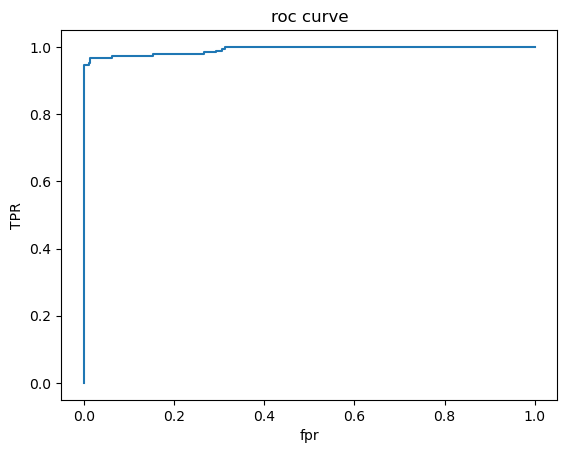

In [46]:
%matplotlib inline
plt.ylabel("TPR")   
plt.xlabel("fpr")
plt.title("roc curve")
plt.plot(fpr,tpr)

# Now making model again using bernaulli naive Bayes

In [62]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
bnb = BernoulliNB()
bnb.fit(X_train_transformed, y_train)

y_pred_class_bnb = bnb.predict(X_test_transformed)
y_pred_prob_bnb = bnb.predict_proba(X_test_transformed)
print("BernoulliNB      mutlinomial ")    
print(metrics.accuracy_score(y_test, y_pred_class_bnb), metrics.accuracy_score(y_test,y_pred_class))

BernoulliNB      mutlinomial 
0.9770279971284996 0.9877961234745154


In [63]:
bnb


BernoulliNB()

In [64]:
metrics.recall_score(y_test, y_pred_class_bnb)

0.8324324324324325

In [65]:
from imblearn.metrics import specificity_score
specificity_score(y_test, y_pred_class_bnb)

0.9991721854304636

In [66]:
import sklearn
sklearn.metrics.precision_score(y_test, y_pred_class_bnb)

0.9935483870967742

In [67]:
sklearn.metrics.f1_score(y_test, y_pred_class_bnb)

0.9058823529411765

In [68]:
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_pred_prob_bnb[:,1])
roc_auc_bnb = auc(fpr_bnb,tpr_bnb)

In [70]:
print(roc_auc_bnb)

0.9967692858421334


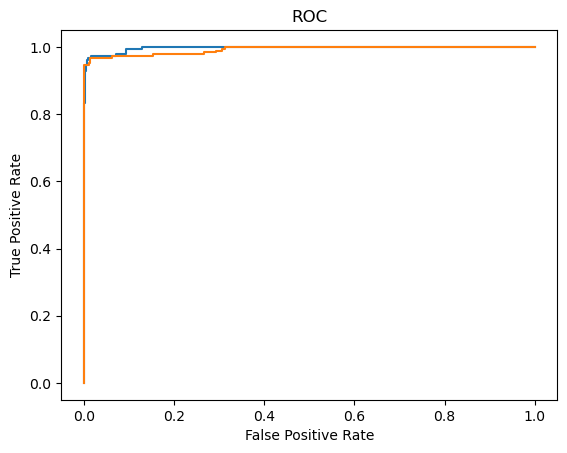

In [72]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(fpr_bnb,tpr_bnb)
plt.plot(fpr,tpr)
# multinomial and bernaulli